# Projeto de Pesquisa em Ciência de Dados e Jurimetria.

> *Autor*: Humberto Bezerra de Meneses Júnior 

>*E-mail*: humbertojunior [at] gmail [dot] com

>*Data*: 20 de julho de 2018



---





> ***Objetivo***: Verificação dos datasets disponibilizados pelo SINESPJC - Sistema Nacional de Estatísticas do Ministério da Justiça e da Justiça Criminal acerca dos principais tipos penais catalogados em sua base e se há relação com possíveis políticas públicas já implementadas. Adicionalmente, auxiliar em uma traçado estratégico de futuras ações governamentais, considerando inclusive aspectos atinentes ao Direito como criminalização de condutas previamente catalogadas e sua relação dentro de um espaço e tempo definido para atuação de medidas estatais com prospecção para anos vindouros.


>***Metodologia***: Avaliação do dataset disponibilizado de ocorrências no exercício 2017  em suas medidas estatisticas e inferências de duas das variáveis mais relevantes para o estudo : Região e tipo penais submetidas a 2 processos de exibição gráfica.

>***Fonte dos dados em dataset específico do ano 2017***: [SINESPJC - MJ ](http://dados.mj.gov.br/dataset/sistema-nacional-de-estatisticas-de-seguranca-publica)



In [0]:
# principais bibliotecas ou módulos utilizados : matplotlib,seaborn,pandas
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sea
pt.show()
pt.style.use('ggplot')



---


## 1. Etapa - Análise prévia dos dados envolvidos na "raspagem" 
>Qualquer análise estatística computacional não vao econtrar dados "prontos" para uso .É frequente inclusive nos deparamos com impurezas, dados incorretamente dispostos na tabela ou com significado obstrutivo a um processo de ciência de dados. Por isso é relevante proceder com a eliminação de impurezas(inconsistência de linhas , tipo de dados envolvidos, dados em branco ou nulos,etc) que venham a prejudicar nossa orientação científica. Nesta seção procederemos com esta extração e filtragem de dados, por isso é importante visualizar a disposição deles no modelo.

In [0]:
## Dataset originalmente extraido de http://dados.mj.gov.br/dataset/sistema-nacional-de-estatisticas-de-seguranca-publica
## Utilização do dataset de 2017 e comitado em meu gitlab
## Procedimento de Raspagem e Nivelamento de dados
## Obs:Foi verificado inconsistência de dados(rótulos)nas primeiras linhas eliminadas da análise estatistica - Limpeza de dados necessária
## Procedimento de Limpeza obrigatório figurado em parametrização 'header = 4'

url='https://gitlab.com/humbertobezerra/datascience/raw/master/dataset/ocorrenciasmun-brasil2017.csv'
dados = pd.read_csv(url, sep=';',header =4, error_bad_lines= False)
primeira_linha = dados.head(0)

## Checagem de novo rótulo agora figurando como primeira linha do processo a ser implementado em diante
primeira_linha 


Empty DataFrame
Columns: [Regiao, Sigla UF, UF, Codigo IBGE Municipio, Municipio, Tipo Crime, Mes, Mes/Ano, PC-Qtde Ocorrencias]
Index: []

In [0]:
# Uma simples checagem dos dados envolvidos no processo
dados.dtypes

Regiao                    object
Sigla UF                  object
UF                        object
Codigo IBGE Municipio      int64
Municipio                 object
Tipo Crime                object
Mes                        int64
Mes/Ano                   object
PC-Qtde Ocorrencias      float64
dtype: object

In [0]:
# Uma amostra de exibição dos 15 primeiros registros
dados.head(15)

Regiao Sigla UF                UF  Codigo IBGE Municipio Municipio  \
0   CENTRO-OESTE       DF  Distrito Federal              530010801  Brasilia   
1   CENTRO-OESTE       DF  Distrito Federal              530010801  Brasilia   
2   CENTRO-OESTE       DF  Distrito Federal              530010801  Brasilia   
3   CENTRO-OESTE       DF  Distrito Federal              530010801  Brasilia   
4   CENTRO-OESTE       DF  Distrito Federal              530010801  Brasilia   
5   CENTRO-OESTE       DF  Distrito Federal              530010801  Brasilia   
6   CENTRO-OESTE       DF  Distrito Federal              530010801  Brasilia   
7   CENTRO-OESTE       DF  Distrito Federal              530010801  Brasilia   
8   CENTRO-OESTE       DF  Distrito Federal              530010801  Brasilia   
9   CENTRO-OESTE       DF  Distrito Federal              530010801  Brasilia   
10  CENTRO-OESTE       DF  Distrito Federal              530010801  Brasilia   
11  CENTRO-OESTE       DF  Distrito Federal              530010801  Brasilia   
12  CENTRO-OESTE       DF  Distrito Federal              530010801  Brasilia   
13  CENTRO-OESTE       DF  Distrito Federal              530010801  Brasilia   
14  CENTRO-OESTE       DF  Distrito Federal              530010801  Brasilia   

          Tipo Crime  Mes  Mes/Ano  PC-Qtde Ocorrencias  
0            Estupro    1  01/2017                  3.0  
1            Estupro    2  02/2017                  1.0  
2            Estupro    3  03/2017                  6.0  
3            Estupro    4  04/2017                  3.0  
4            Estupro    5  05/2017                  8.0  
5            Estupro    6  06/2017                  4.0  
6   Furto de veiculo    1  01/2017                146.0  
7   Furto de veiculo    2  02/2017                 38.0  
8   Furto de veiculo    3  03/2017                130.0  
9   Furto de veiculo    4  04/2017                109.0  
10  Furto de veiculo    5  05/2017                168.0  
11  Furto de veiculo    6  06/2017                123.0  
12  Homicidio doloso    1  01/2017                  2.0  
13  Homicidio doloso    2  02/2017                  2.0  
14  Homicidio doloso    4  04/2017                  1.0

In [0]:
# Verifica se na coluna Ano tem dados em branco/nulo - Eliminação de impurezas
dados[dados['PC-Qtde Ocorrencias'].isnull()].head()

Empty DataFrame
Columns: [Regiao, Sigla UF, UF, Codigo IBGE Municipio, Municipio, Tipo Crime, Mes, Mes/Ano, PC-Qtde Ocorrencias]
Index: []



---


## 2. Etapa - Analise estatistica dos valores do dataset de 2017 

> É mister realizar previamente uma contagem sumarizada  das quantidades de ocorrências. Essa medida pode ser facilitada também na consequente construção emuma gráfico de dados para verificação qual possível cenário de região mais violenta, facilmente visualizado em uma gráfico de barras,por exemplo.

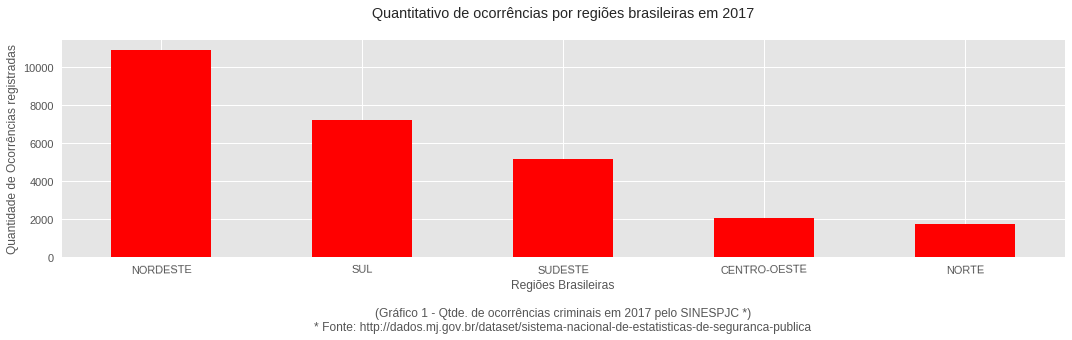

In [0]:
# Contagem de ocorrências em cada uma das 5 regiões brasileiras
dados_x=dados['Regiao'].value_counts()
dados_x.head(5).plot(kind='bar',figsize=(18,4),grid=True, rot=1, color='red')

pt.title('Quantitativo de ocorrências por regiões brasileiras em 2017\n')
pt.xlabel('Regiões Brasileiras\n\n(Gráfico 1 - Qtde. de ocorrências criminais em 2017 pelo SINESPJC *)\n* Fonte: http://dados.mj.gov.br/dataset/sistema-nacional-de-estatisticas-de-seguranca-publica')
pt.ylabel('Quantidade de Ocorrências registradas')
pt.show()

In [0]:
# Transformação utilizada : identificação da amostra de atributos mais relevantes e realização de produto cartesiano com sumarização
# de suas somas e exibição das duas variáveis envolvaidas, no caso a Região por quantitaativo verificado e somado a um total do tipo penal.
dados_cross=pd.crosstab(dados['Regiao'], dados['Tipo Crime'])
dados_cross
#dados_cross.describe()

Tipo Crime    Estupro  Furto de veiculo  Homicidio doloso  \
Regiao                                                      
CENTRO-OESTE      647               550               438   
NORDESTE         1615              2364              3398   
NORTE             306               306               652   
SUDESTE          1336              1813               719   
SUL              1867              2783              1004   

Tipo Crime    Lesao corporal seguida de morte  Roubo de veiculo  \
Regiao                                                            
CENTRO-OESTE                               14               375   
NORDESTE                                  160              3058   
NORTE                                      35               319   
SUDESTE                                    21              1146   
SUL                                        62              1426   

Tipo Crime    Roubo seguido de morte (latrocinio)  
Regiao                                             
CENTRO-OESTE                                   44  
NORDESTE                                      323  
NORTE                                          91  
SUDESTE                                       130  
SUL                                            95



---

## 3. Etapa - Escolha de um dos tipos penais  e verificação do modelo
> No exemplo, o tipo penal estupro, permite que concluamos uma validação das principais medidas estatisticas(variância, média...) percebidas de cálculo no nosso modelo para uma comprovação de hipótese de dados acertadamente contados em analise prévia em cruzamento feito. A validação do modelo torna-se pressuposto em qualquer análise de dados.

In [0]:

# Escolha de um dos tipos penais (exemplo:estupro) e verificação de validação das principais medidas estatisticas(variância, média...)
dados_cross['Estupro'].describe()

count       5.000000
mean     1154.200000
std       657.679025
min       306.000000
25%       647.000000
50%      1336.000000
75%      1615.000000
max      1867.000000
Name: Estupro, dtype: float64



---


## 4. Etapa - Concepção de um gráfico do tipo "mapa de calor"
> A exibição dos principais tipos penais envolvidos no dataset e com essa construção diagramada em cores permite uma melhor percepção de dispersão dos crimes , não mais como mero quantitativo  e sim como um problema social que tem tons constritos a uma diversificada faixa de valores e aparece com mais gravidade em determinados pontos do Brasil. Assim, é o que esta seção e seu esboço do que podemos pensar sobre medidas públicas não mais concentradas em termos de segurança pública una, todavia mais estratégica com cada especificidade regional.

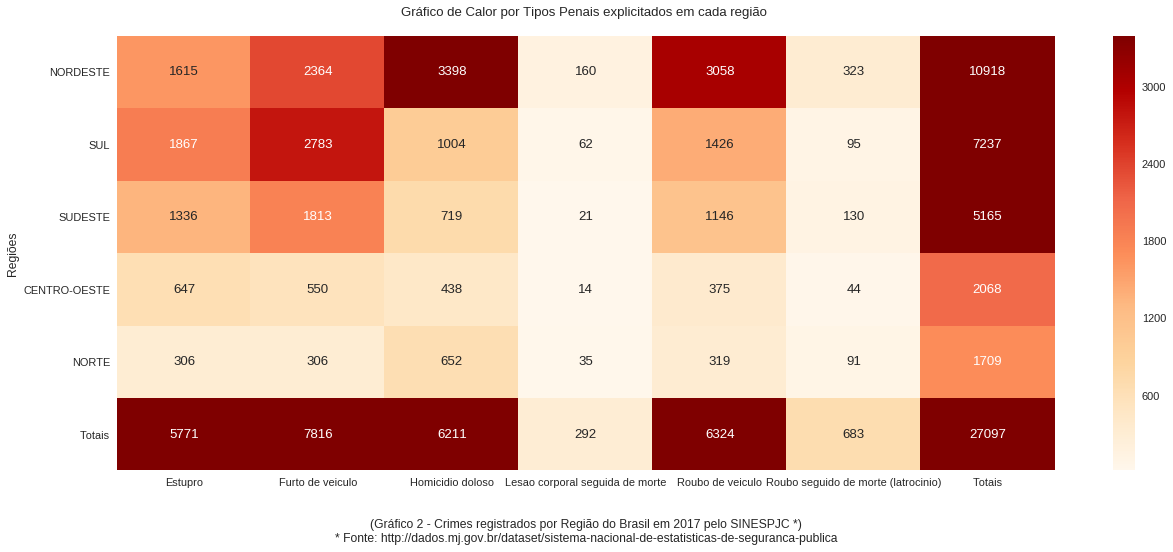

In [0]:
crosstab_inicial = pd.crosstab(dados['Regiao'], dados['Tipo Crime'])
crosstab_inicial['Totais'] = crosstab_inicial.sum(axis=1)

top5_dados= crosstab_inicial[crosstab_inicial['Totais'] > 1000].sort_values('Totais', ascending = False)

top5_f= top5_dados.append(pd.DataFrame(top5_dados.sum(), columns=['Totais']).T, ignore_index=False)

sea.set(font_scale=1.10)
pt.figure(figsize=(21,8))
sea.heatmap(top5_f,cmap="OrRd", annot=True, vmax=top5_f.loc[:'NORDESTE', :'Homicídio doloso'].values.max(), vmin=top5_f.loc[:'NORTE', :'Lesão corporal seguida de morte'].values.min(), fmt='d')

pt.title('Gráfico de Calor por Tipos Penais explicitados em cada região \n')
pt.xlabel('\n\n(Gráfico 2 - Crimes registrados por Região do Brasil em 2017 pelo SINESPJC *)\n* Fonte: http://dados.mj.gov.br/dataset/sistema-nacional-de-estatisticas-de-seguranca-publica')
pt.ylabel('Regiões')
pt.show()



---

## 5. Etapa - Resoluções obtidas a partir de um gráfico do tipo "mapa de calor"

### Algumas hipóteses podem ser levantadas dos tipos penais acima dispostos sob tons:

*   ### Invoca-se políticas públicas de combate ao crime de receptação de peças pelo tipo de Furto perceber-se mais operante do que o de Roubo de veículos nas diversas regiões.
>  * Deve-se ter o cuidado de analisar com mais rigor esses dados , pois conforme doutrina criminalistica percebe-se o roubo de veículo e também o de furto como meio para realização de outras infrações e poderia  vir a ser "absorvido" em seu tipo, no entanto é de vigor o combate ao que configura receptação de peças para minar tais situações que em diversas regiões mostra-se como precária.

* ###  Lesão corporal seguida de morte é o tipo penal menos incidente.
> * Possível erro de catalogação/registro em boletins de ocorrências? Registros policiais com enfoque em crimes com prévio  * `animus` * ou que envolva premeditação ?

* ###  Lesão corporal seguida de morte é o tipo penal menos incidente(mais brando).
> * Possível erro de catalogação/registro em boletins de ocorrências? Registros policiais com enfoque em crimes com prévio animus ou premeditação?

* ###  Região SUL do País com o maior índice de estupros obtidos  em 2017.
>  * Indício de omissão de registros dessa modalidade de  violência sexual em outras regiões, um maior amadurecimento de denúncia das vítimas ? * Evolutiva futura: cruzar esses dados com registros de modalidade de lesão corporal pelo marido ou companheiro na Lei Maria da Penha  (Lei 11.340/06).* 

*   ### A região brasileira com mais violência nesse rol de tipos é o Nordeste, porém fica mais distribuído o mapa de infrações.
>  * Como a região nordestina tem maior quantidade de registros sumarizados(Gráfico 1) avilta-se possibilidade de perda ou "escoamento" de dados em outras regiões como o Norte. Mas, perceba no SUL em  a infração de estupro consegue superar o padrão vermelho de cores do Nordeste nesse tipo.








---


## 6. Conclusão

O presente trabalho é um primeiro esboço de estudo de jurimetria como área de grau relevante no estudo de problemas sociais bem como de indícios ou levantamento de possíveis estratégias de atuação do Poder Público.


Neste trabalho não compreende-se como rol exaustivo o presente estudo apresentado e sim como alicerce para futuras pesquisas ,tanto diversificando os datasets apresentados como também dando a relevância de continuidade de estudos com outras fontes de pesquisa , inclusive no cruzamento de outras bases de dados públicas com contexto social de segurança publica e medidas a serem tomadas pelo Estado.

Assim, percebe-se como alicerce de aplicação dos recursos públicos pautados em políticas com caráter tecnicista , e mero deleite eleitoral ou casuística pessoal, o que conglomera estudos de jurimetria como potenciais elementos que auxiliem tanto gestores como legisladores dos diversos municípios em ações adstritas ao que mais eficientemente retornem para a sociedade em termos de melhoria do aparelhamento público, assim a relevância de estudos como ciência de dados no levantamento e consecução de tais políticas estatais.

